<a href="https://colab.research.google.com/github/SUBASHREE1762/Microsoft_Engage_2022_Autism-Detection_using_VGG16/blob/main/MS_Engage_20222_Autism_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autism Detection from Facial Image using TensorFlow and VGG16

Autism is a major developmental disease that affects a person's capacity to communicate and interact with others.

Autism spectrum disorder affects the neural system, as well as the affected person's general cognitive, emotional, social, and physical health.

Symptoms might vary greatly in scope and severity. Communication difficulties, social interaction difficulties, compulsive interests, and repeated behaviours are all common signs.

Early detection, as well as behavioural, educational, and family therapy, may help to alleviate symptoms and promote growth and learning.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
print(os.listdir(("/content/drive/My Drive/archive/AutismDataset")))

['train', 'consolidated', 'test', 'valid']


In [ ]:
import math
import random
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
vgg_model = tf.keras.applications.vgg16.VGG16()
print(type(vgg_model))
vgg_model.summary()

553476096/553467096 [==============================] - 3s 0us/step
<class 'keras.engine.functional.Functional'>
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
               

In [ ]:
model = keras.models.Sequential()
for layer in vgg_model.layers[0:-1]:
    model.add(layer)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
for layer in model.layers:
    layer.trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
model.add(layers.Dense(1))

In [ ]:
loss = keras.losses.BinaryCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = ["accuracy"]

model.compile(optimizer=optim, loss=loss, metrics=metrics)

In [ ]:
preprocess_input = tf.keras.applications.vgg16.preprocess_input

In [ ]:
train_dir=os.getcwd()+'/drive/My Drive/archive/AutismDataset/TrainingData'
validation_dir=os.getcwd()+'/drive/My Drive/archive/AutismDataset/valid'

train_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)
valid_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

train_batches = valid_gen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    class_mode='binary',
    batch_size=25,
    shuffle=True,
    color_mode="rgb", 
)

val_batches = valid_gen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    class_mode='binary',
    batch_size=25,
    shuffle=True,
    color_mode="rgb",
)


Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
epochs = 25

early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=2
)
 
history = model.fit(train_batches, validation_data=val_batches,callbacks=[early_stopping],epochs=epochs, verbose=1)
model.save("my_model")

Epoch 1/25
4/4 [==============================] - 40s 9s/step - loss: 0.1913 - accuracy: 0.9300 - val_loss: 0.1787 - val_accuracy: 0.9400
Epoch 2/25
4/4 [==============================] - 1s 401ms/step - loss: 0.1732 - accuracy: 0.9400 - val_loss: 0.1661 - val_accuracy: 0.9700
Epoch 3/25
4/4 [==============================] - 1s 399ms/step - loss: 0.1636 - accuracy: 0.9700 - val_loss: 0.1545 - val_accuracy: 0.9700
Epoch 4/25
4/4 [==============================] - 1s 404ms/step - loss: 0.1546 - accuracy: 0.9600 - val_loss: 0.1438 - val_accuracy: 0.9600
Epoch 5/25
4/4 [==============================] - 1s 402ms/step - loss: 0.1419 - accuracy: 0.9700 - val_loss: 0.1347 - val_accuracy: 0.9800
Epoch 6/25
4/4 [==============================] - 1s 403ms/step - loss: 0.1363 - accuracy: 0.9800 - val_loss: 0.1273 - val_accuracy: 0.9800
Epoch 7/25
4/4 [==============================] - 1s 408ms/step - loss: 0.1242 - accuracy: 0.9800 - val_loss: 0.1197 - val_accuracy: 0.9900
Epoch 8/25
4/4 [======

In [ ]:
test_dir=os.getcwd()+'/drive/My Drive/archive/AutismDataset/consolidated'
test_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

test_batches = test_gen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    class_mode='sparse',
    batch_size=4,
    shuffle=False,
    color_mode="rgb",
)

Found 1763 images belonging to 2 classes.


In [ ]:
model.evaluate(test_batches, verbose=2)

441/441 - 485s - loss: 0.7177 - accuracy: 0.7079 - 485s/epoch - 1s/step


[0.7176540493965149, 0.7078843116760254]

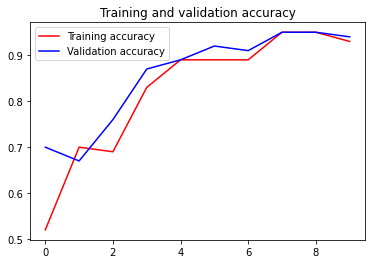

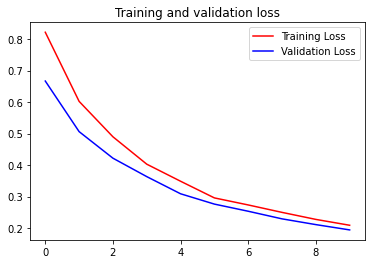

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()